In [2]:
# import python libraries
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [3]:
df=pd.read_csv(r'C:\Users\GHANESH\Downloads\Zomato data  (1).csv', encoding= 'unicode_escape')

In [4]:
df.shape

(148, 7)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
pd.isnull(df).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

There are no Null Values in Rate , Vote , cost coloumn.

In [8]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace('/5', '')  # Remove '/5'
df['rate'] = pd.to_numeric(df['rate'])  #Convert to numeric
print(df['rate'].dtype)

float64


In [9]:
print(df['rate'])

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


We have converted Rate coloumn to numneric value by removing extra character.


In [10]:
print(df['approx_cost(for two people)'])

0      800
1      800
2      800
3      300
4      600
      ... 
143    100
144    150
145    450
146    800
147    200
Name: approx_cost(for two people), Length: 148, dtype: int64


In [11]:
print(df['approx_cost(for two people)'].dtype)

int64


approx_cost(for two people) column is already in numeric format without commas.

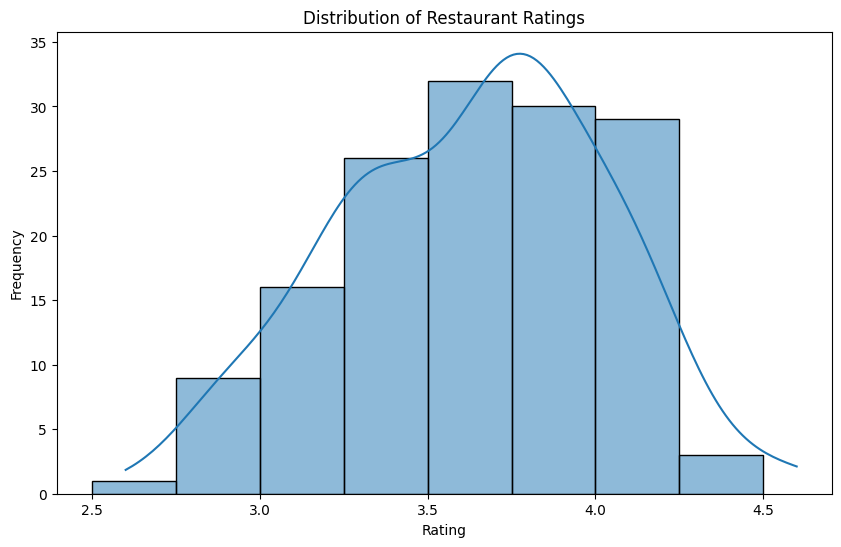

In [12]:
# Plot the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=[2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50], kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Calculate the skewness
rating_skewness = skew(df['rate'])
print(f'Skewness of the rating distribution: {rating_skewness}')

# Interpret the skewness
if rating_skewness > 0:
    print("The distribution is positively skewed, indicating a skew towards higher ratings.")
elif rating_skewness < 0:
    print("The distribution is negatively skewed, indicating a skew towards lower ratings.")
else:
    print("The distribution is symmetric.")

Skewness of the rating distribution: -0.15446326484310383
The distribution is negatively skewed, indicating a skew towards lower ratings.


listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


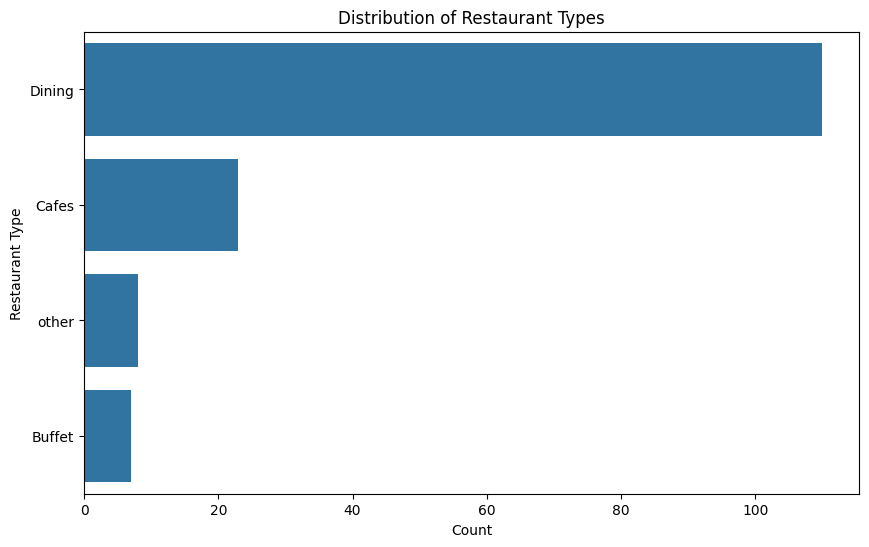

In [14]:

# Count the occurrences of each restaurant type
restaurant_counts = df['listed_in(type)'].value_counts()

# Display the most common restaurant types
print(restaurant_counts)

# Plot the distribution of restaurant types

plt.figure(figsize=(10, 6))
sns.countplot(y=df['listed_in(type)'], order=restaurant_counts.index)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

  listed_in(type)      rate  votes
0          Buffet  3.842857   3028
1           Cafes  3.765217   6434
2          Dining  3.571818  20363
3           other  3.912500   9367


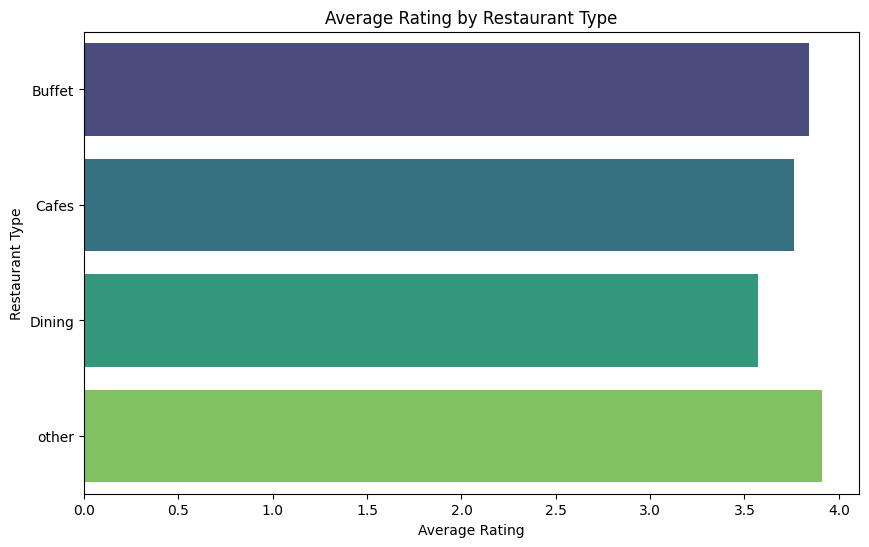

In [15]:
grouped_df = df.groupby('listed_in(type)').agg({'rate': 'mean', 'votes': 'sum'}).reset_index()

# Display the grouped DataFrame
print(grouped_df)

# Plot the average rating for each restaurant type
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='rate', y='listed_in(type)', palette='viridis',hue='listed_in(type)',legend=False)
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Type')
plt.show()



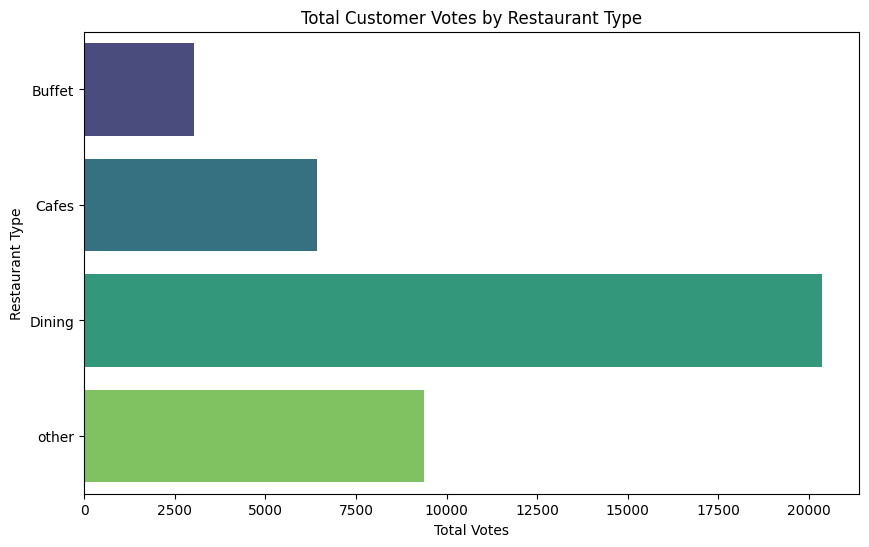

In [16]:
# Plot the total votes for each restaurant type
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='votes', y='listed_in(type)', palette='viridis',hue='listed_in(type)',legend=False)
plt.title('Total Customer Votes by Restaurant Type')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Type')
plt.show()

In [17]:
# Group by 'online_order' and calculate the average rating and total votes
grouped_df = df.groupby('online_order').agg({'rate': 'mean', 'votes': 'sum'}).reset_index()

# Display the grouped DataFrame
print(grouped_df)

  online_order      rate  votes
0           No  3.487778   6770
1          Yes  3.858621  32422


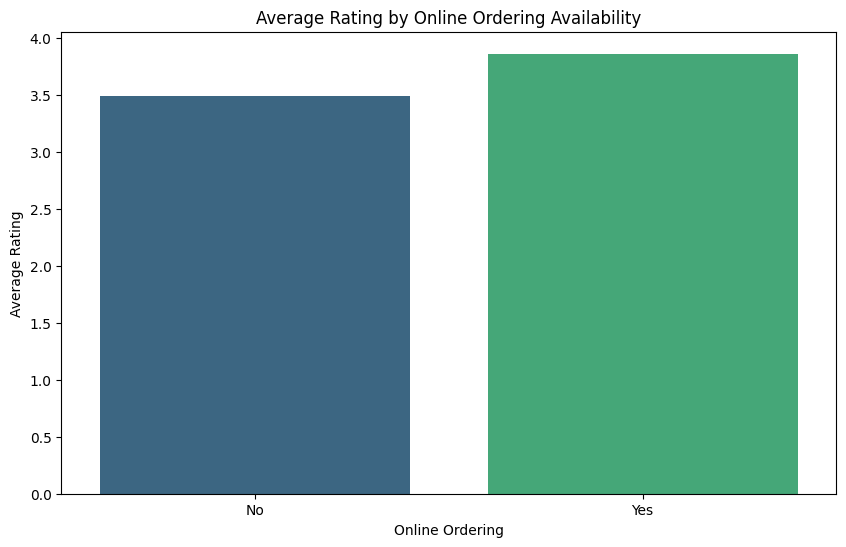

In [18]:
# Plot the average rating for restaurants with and without online ordering
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='online_order', y='rate', palette='viridis',hue='online_order',legend=False)
plt.title('Average Rating by Online Ordering Availability')
plt.xlabel('Online Ordering')
plt.ylabel('Average Rating')
plt.show()

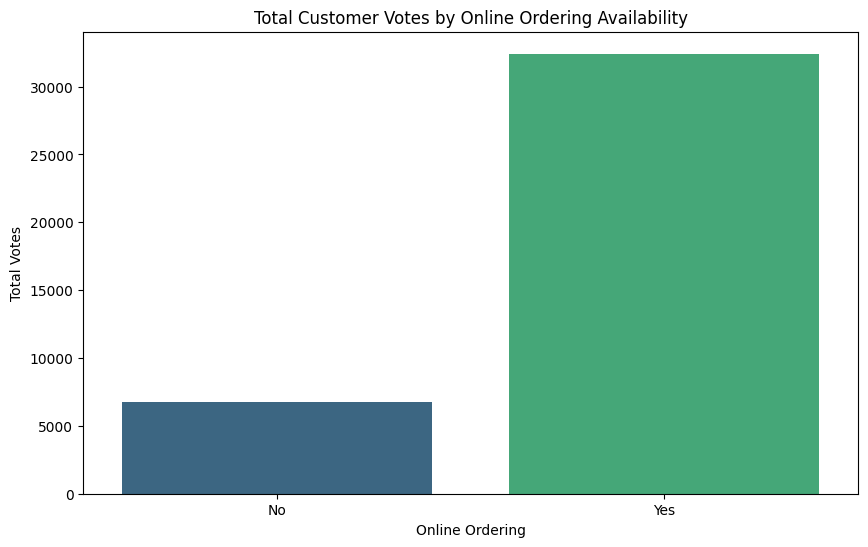

In [19]:
# Plot the total votes for restaurants with and without online ordering
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='online_order', y='votes', palette='viridis',hue='online_order',legend=False)
plt.title('Total Customer Votes by Online Ordering Availability')
plt.xlabel('Online Ordering')
plt.ylabel('Total Votes')
plt.show()

Above graph shows that the restaurents with online ordering option have higher Votes and Ratings.

In [20]:
# Group by 'book_table' and calculate the average rating and total votes

grouped_df1 = df.groupby('book_table').agg({'rate': 'mean', 'votes': 'sum'}).reset_index()

# Display the grouped DataFrame
print(grouped_df1)

  book_table      rate  votes
0         No  3.601429  31666
1        Yes  4.187500   7526


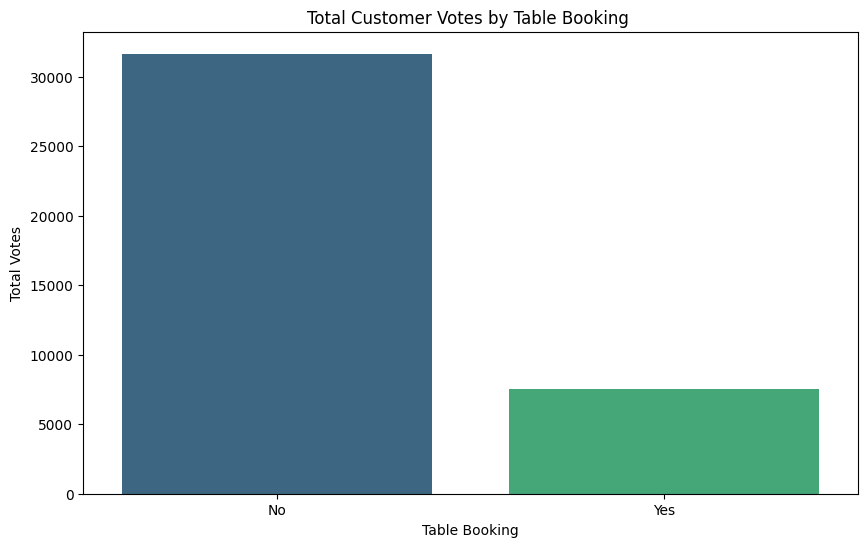

In [21]:
# Plot the total votes for restaurants with and without table booking
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df1, x='book_table', y='votes', palette='viridis',hue='book_table',legend=False)
plt.title('Total Customer Votes by Table Booking ')
plt.xlabel('Table Booking')
plt.ylabel('Total Votes')
plt.show()

Above graph shows that the restaurents with no Table Booking have higher votes.

In [22]:
# Plot the average rating for restaurants with and without Table Booking
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='book_table', y='rate', palette='viridis',hue='book_table',legend=False)
plt.title('Average Rating by Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.show()

ValueError: Could not interpret value `book_table` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

From the above graph , it shows that the restaurents with higher table booking have higher ratings .

In [ ]:
# Calculate the average cost for two people
average_cost = df['approx_cost(for two people)'].mean()

# Display the average cost
print(f'The average cost of dining for two people is ₹{average_cost:.2f}')

The average cost of dining for two people is ₹418.24


In [ ]:
# Calculate the correlation between cost and rating
correlation = df['approx_cost(for two people)'].corr(df['rate'])
print(f'Correlation between cost and rating: {correlation:.2f}')

Correlation between cost and rating: 0.28


In [ ]:
# Filter the DataFrame for "Dining" restaurants
dining_df = df[df['listed_in(type)'] == 'Dining']

# Calculate the average cost for "Dining" restaurants
average_cost_dining = dining_df['approx_cost(for two people)'].mean()

# Display the average cost
print(f'The average cost of dining for two people in "Dining" restaurants is ₹{average_cost_dining:.2f}')

The average cost of dining for two people in "Dining" restaurants is ₹357.27


Correlation between cost and rating: 0.28


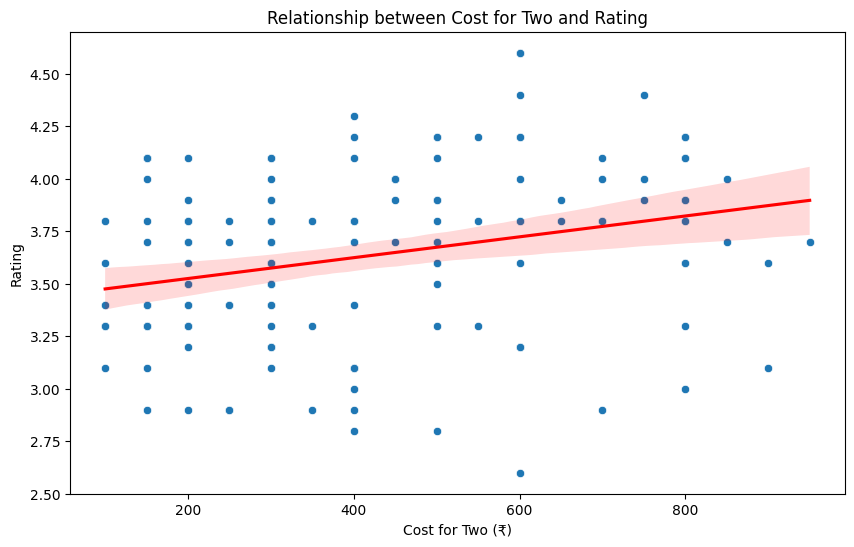

In [ ]:
# Calculate the correlation between cost and rating
correlation = df['approx_cost(for two people)'].corr(df['rate'])
print(f'Correlation between cost and rating: {correlation:.2f}')

# Plot the relationship between cost and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate')
sns.regplot(data=df, x='approx_cost(for two people)', y='rate', scatter=False, color='red')
plt.title('Relationship between Cost for Two and Rating')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Rating')
plt.show()


This code generates a scatter plot with a regression line:

The scatter plot shows individual data points representing the cost for two people and the corresponding rating.
The regression line (in red) shows the trend in the data, indicating the overall relationship between cost and rating.

Insights from the Graph
Correlation Value: 0.28
Regression Line: 
From the above graph , it shows that higher cost has higher ratings.



In [ ]:


# Filter the DataFrame for the relevant restaurant types (Buffet and Delivery)
filtered_df = df[df['listed_in(type)'].isin(['Buffet', 'other'])]

# Group by 'Types of restaurant' and calculate the average cost
grouped_df = filtered_df.groupby('listed_in(type)').agg({'approx_cost(for two people)': 'mean'}).reset_index()

# Display the grouped DataFrame
print(grouped_df)

  listed_in(type)  approx_cost(for two people)
0          Buffet                   671.428571
1           other                   668.750000


Correlation between votes and ratings: 0.49


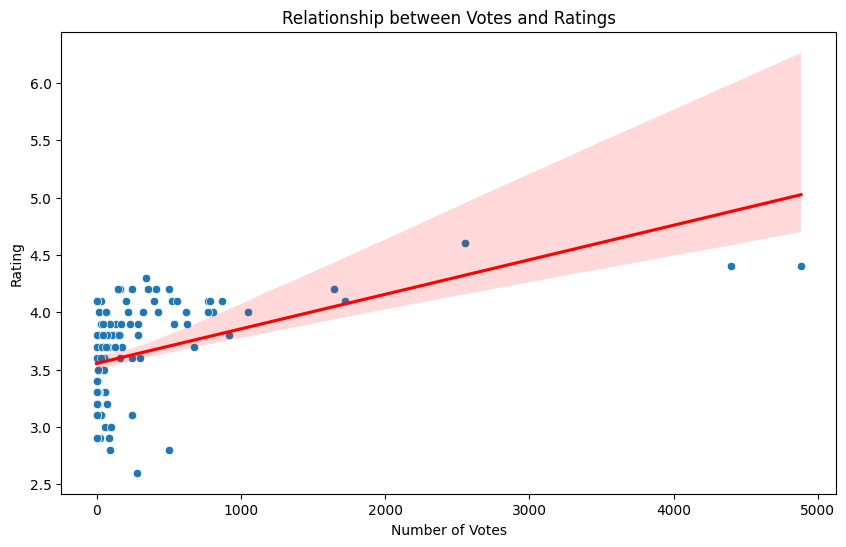

In [ ]:
# Calculate the correlation between votes and ratings
correlation = df['votes'].corr(df['rate'])
print(f'Correlation between votes and ratings: {correlation:.2f}')

# Plot the relationship between votes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='votes', y='rate')
sns.regplot(data=df, x='votes', y='rate', scatter=False, color='red')
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

Positive Correlation: The red regression line indicates a positive correlation between the number of votes and ratings. As the number of votes increases, the rating tends to increase slightly.

Clustered Data at Low Votes: Most of the data points are concentrated at the lower end of the vote count, suggesting that the majority of items received fewer votes.

Outliers at High Votes: There are a few data points with significantly high vote counts that deviate from the general trend, which could indicate highly popular items with varying ratings.

In [ ]:
# Compute correlation matrix
correlation_matrix = df[['votes', 'rate', 'approx_cost(for two people)']].corr()

# Display correlation matrix
print(correlation_matrix)

                                votes      rate  approx_cost(for two people)
votes                        1.000000  0.489844                     0.324372
rate                         0.489844  1.000000                     0.275216
approx_cost(for two people)  0.324372  0.275216                     1.000000


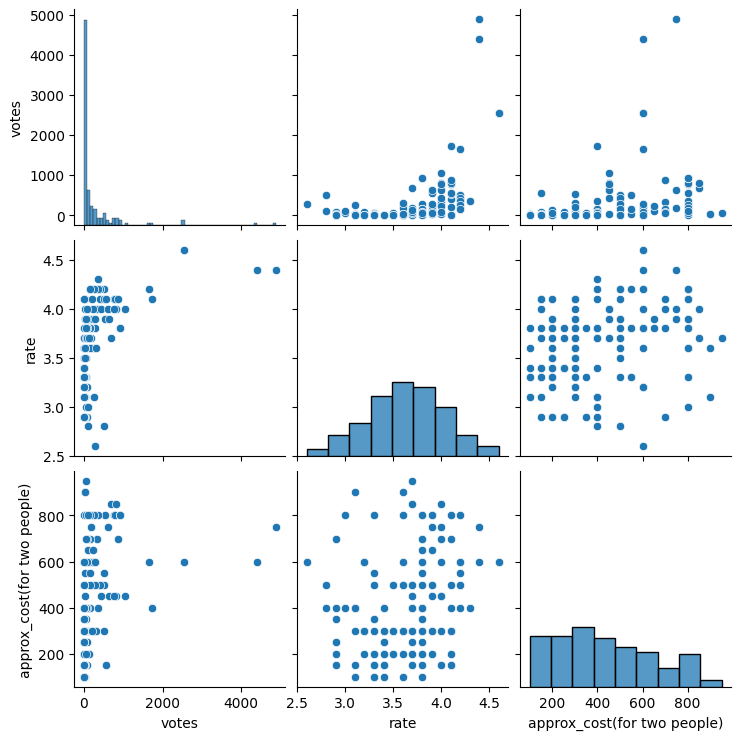

In [ ]:
sns.pairplot(df[['votes', 'rate', 'approx_cost(for two people)']])
plt.show()

In [25]:
# Calculate the percentage of restaurants that offer online ordering
online_order_counts = df['online_order'].value_counts()
online_order_labels = online_order_counts.index
online_order_sizes = online_order_counts.values

# Calculate the percentage of restaurants that offer table booking
book_table_counts = df['book_table'].value_counts()
book_table_labels = book_table_counts.index
book_table_sizes = book_table_counts.values

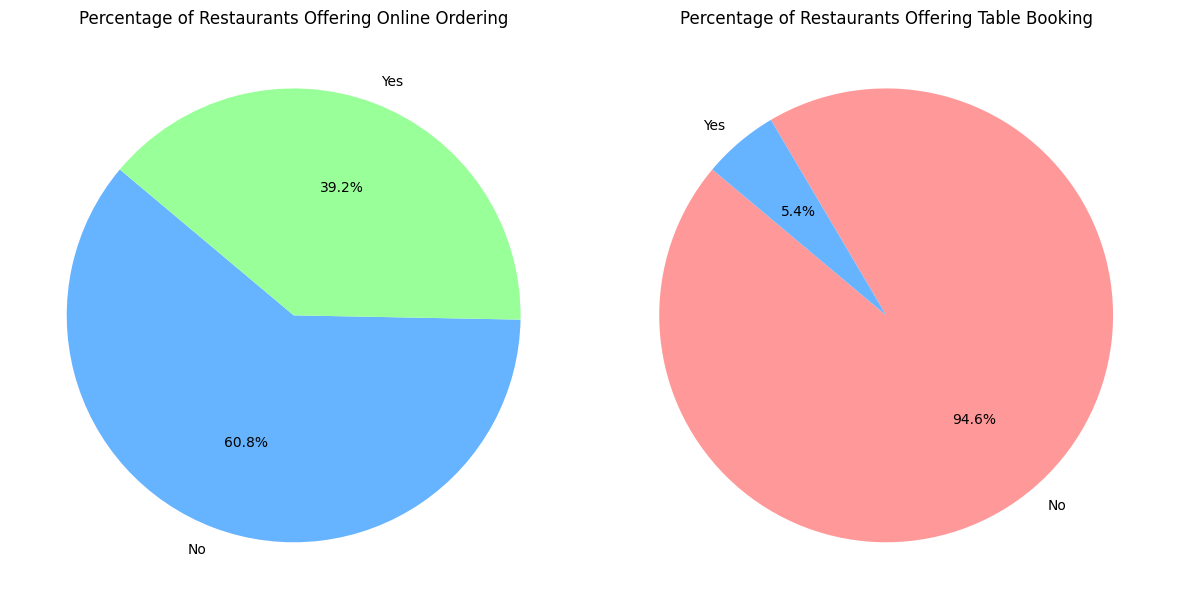

In [29]:
# Create the pie chart for online ordering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(online_order_sizes, labels=online_order_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Percentage of Restaurants Offering Online Ordering')

# Create the pie chart for table booking
plt.subplot(1, 2, 2)
plt.pie(book_table_sizes, labels=book_table_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Restaurants Offering Table Booking')

plt.tight_layout()
plt.show()